In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

In [4]:
df_can = pd.read_excel("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx",
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
print("File is  ready")

File is  ready


In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.shape

(195, 43)

In [9]:
#df_can.drop(["AREA","REG", "DEV", "Type", "Coverage"], axis= 1 , inplace = True)
df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index("Country", inplace = True)

df_can["Total"] = df_can.sum(axis = 1)

year = list(map(str, range(1980,2014)))
print("Data Diamensions:", df_can.shape)

KeyError: "None of ['Country'] are in the columns"

In [11]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use("ggplot")


In [13]:
# waffle chart

df_dsn = df_can.loc[["Denmark", "Sweden","Norway"], :]
df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [19]:
# create waffle laibraries
total_values = df_dsn["Total"].sum()
category_proportion = [(float(value)/ total_values) for value in df_dsn["Total"]]
print(category_proportion)

for i, proportion in enumerate(category_proportion):
    print(df_dsn.index.values[i] + ":" + str(proportion))



[0.32255663965602777, 0.48503390110798744, 0.1924094592359848]
Denmark:0.32255663965602777
Sweden:0.48503390110798744
Norway:0.1924094592359848


In [23]:
# define  size of waffle chart

width = 40
height = 10

total_num_tiles = width * height
print("The numnber of chart is " + str(total_num_tiles))

The numnber of chart is 400


In [29]:
# compute number of titles for each categories
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportion]

for i, tiles in enumerate(tile_per_category):
    print(df_dsn.index.values[i] + ":" + str(tiles))


Denmark:129.0
Sweden:194.0
Norway:77.0


In [30]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [32]:
waffle_chart.shape

(10, 40)

<Figure size 432x288 with 0 Axes>

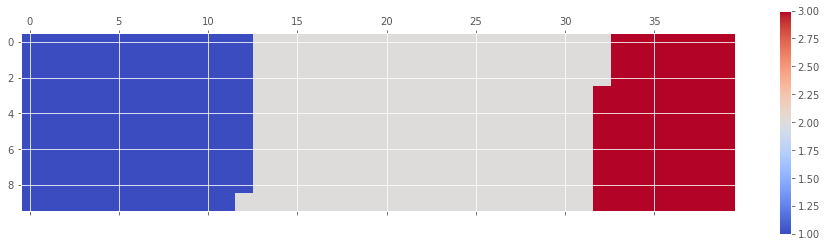

In [33]:
#Map the waffle chart matrix into a visual.

# initiate new figure object
fig = plt.figure()

# use matshow to display waffle chart
colormap =  plt.cm.coolwarm
plt.matshow(waffle_chart, cmap= colormap)
plt.colorbar()



<Figure size 432x288 with 0 Axes>

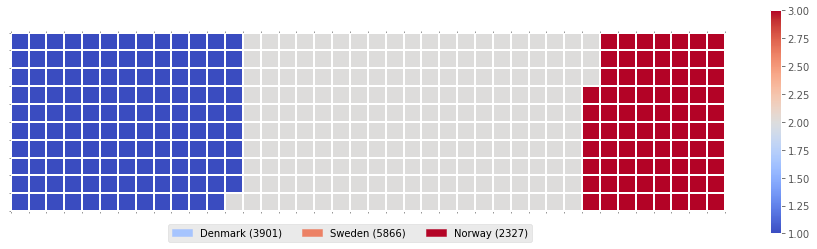

In [41]:
# Prettify the chart.
fig =  plt.figure()
# use matshow to show waffle chart
colormap =  plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

# get the axis
ax =  plt.gca()

#set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor  =  True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

#add guide lines based on minor ticks
ax.grid(which="minor", color = "w", linestyle= "-", linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend

values_cumsum = np.cumsum(df_dsn["Total"])
total_values =  values_cumsum[len(values_cumsum) - 1]
'''
#create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + "( " + str(df_dsn["Total"][i])+ ")"
    color_var = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color= color_var, label= label_str))

#add legend to chart
plt.legend(handles=legend_handles,
          loc="lower center",
          ncol= len(df_dsn.index.values),
          bbox_to_anchor= (0. , -0.2, 0.95, .1)
          )
'''


# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
